Compare meteo temp data with image temps
---



In [63]:
import pandas as pd
import os
from numpy import intersect1d
import matplotlib.pyplot as plt


#load data from live_view images
text_data_file = '../weather-data/tesseract/live_view_inted.csv'
livetemp = pd.read_csv(text_data_file, index_col = None)
livetemp

#load data from meteo
meteo_data_file = '../weather-data/meteostat/devries-centered-75mi.csv'
meteodata = pd.read_csv(meteo_data_file, index_col=None)

#load image data with times
image_data_file = '../photos/live_image_df.csv'
idf = pd.read_csv(image_data_file, index_col=None)

#convert to datetime
meteodata['datetime'] = pd.to_datetime(meteodata['time'])
idf['datetime'] = pd.to_datetime(idf['date'])
                                 
# meteodata.join(livetemp, lsuffix="_meteo", rsuffix='_livetemp')

#tack livetemp on
idf = idf.join(livetemp)

#convert livetemp to centigrade
idf['tempc'] = (idf['temp']-32)*(5/9)


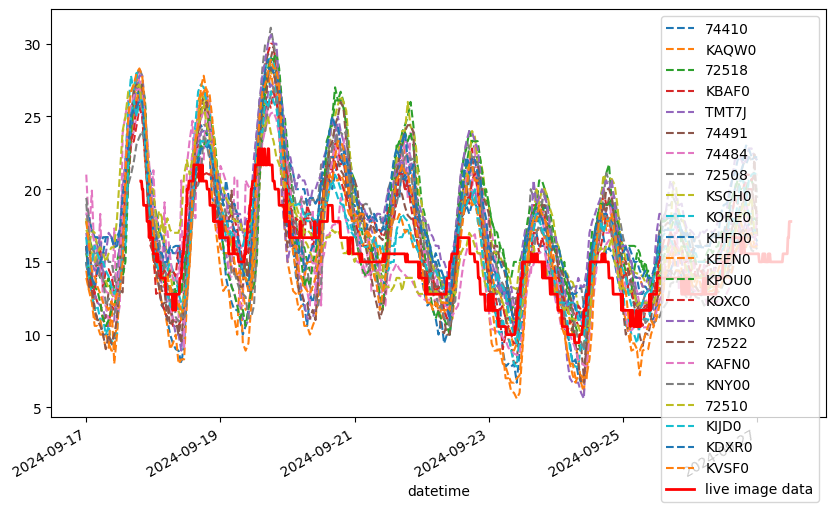

In [2]:
#plot the temperatures

fig, ax = plt.subplots(figsize=(10,6))

for station in meteodata['station'].unique():
    this_station_data = meteodata.loc[meteodata['station'] == station]
    # data_noindex.loc[data_noindex['station'] == station].plot(x='time', y='temp')
    ax.plot(this_station_data['datetime'], this_station_data['temp'], label=station, linestyle='--')

idf.plot(x='datetime', y='tempc', label = 'live image data', ax=ax, color = 'red', linestyle='-', linewidth = 2)

plt.legend()


plt.show()

<Axes: xlabel='datetime'>

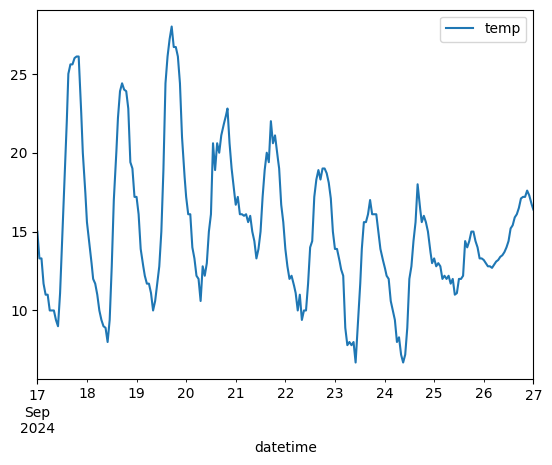

In [29]:
#make a list of unique stations
stations = meteodata['station'].value_counts().index


#make a 15 minute interpolation data for each station

station_intertemps = {}
for station in stations:
    station_mask = meteodata['station'] == station
    this_data = meteodata.loc[station_mask, ['temp','datetime']]
    this_data_series = this_data.set_index('datetime')
    this_15min_data = this_data_series.resample('15min').interpolate()
    station_intertemps.update({station:this_15min_data})

#perform a cross-correlation with the temperature data and these series
station_intertemps['74410'].plot()

In [43]:
idf['datetime']

0      2024-09-17 19:30:00
1      2024-09-17 19:45:00
2      2024-09-17 20:00:00
3      2024-09-17 20:15:00
4      2024-09-17 20:30:00
               ...        
1010   2024-09-27 11:15:00
1011   2024-09-27 11:30:00
1012   2024-09-27 11:45:00
1013   2024-09-27 12:00:00
1014   2024-09-27 12:01:49
Name: datetime, Length: 1015, dtype: datetime64[ns]

In [45]:
station_intertemps['74410'].index

DatetimeIndex(['2024-09-17 00:00:00', '2024-09-17 00:15:00',
               '2024-09-17 00:30:00', '2024-09-17 00:45:00',
               '2024-09-17 01:00:00', '2024-09-17 01:15:00',
               '2024-09-17 01:30:00', '2024-09-17 01:45:00',
               '2024-09-17 02:00:00', '2024-09-17 02:15:00',
               ...
               '2024-09-26 21:45:00', '2024-09-26 22:00:00',
               '2024-09-26 22:15:00', '2024-09-26 22:30:00',
               '2024-09-26 22:45:00', '2024-09-26 23:00:00',
               '2024-09-26 23:15:00', '2024-09-26 23:30:00',
               '2024-09-26 23:45:00', '2024-09-27 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=961, freq='15min')

In [76]:
aligned_data = station_intertemps['74410'].join(img_temps, on='datetime')

<Axes: xlabel='datetime'>

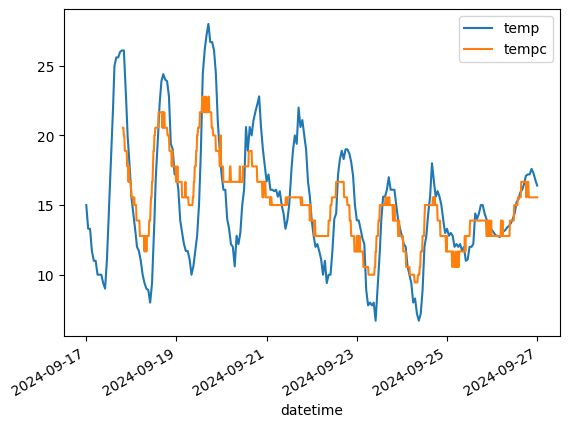

In [78]:
aligned_data.plot()

In [81]:
aligned_data.corr()

,temp,tempc
temp,1.000000,0.781955
tempc,0.781955,1.000000


In [101]:
#put all the temperatures in one dataframe
tempdf = pd.DataFrame([intertemp['temp'].rename(f"temp_{key}") for key, intertemp in station_intertemps.items()]).T

In [104]:
tdf = tempdf.join(img_temps, on='datetime')

In [106]:
tdf.corr()

,temp_74410,temp_KAQW0,temp_KDXR0,temp_KIJD0,temp_72510,temp_KNY00,temp_KAFN0,temp_72522,temp_KMMK0,temp_KOXC0,...,temp_KORE0,temp_KSCH0,temp_72508,temp_74484,temp_74491,temp_TMT7J,temp_KBAF0,temp_72518,temp_KVSF0,tempc
temp_74410,1.000000,0.958879,0.940349,0.884128,0.709701,0.908027,0.822428,0.929551,0.910108,0.906713,...,0.916969,0.914314,0.921756,0.867961,0.922905,0.957734,0.932086,0.930004,0.949497,0.781955
temp_KAQW0,0.958879,1.000000,0.898770,0.797116,0.567429,0.874894,0.711427,0.921615,0.832027,0.812632,...,0.849958,0.901436,0.853707,0.784235,0.873428,0.957611,0.888149,0.914408,0.891389,0.647951
temp_KDXR0,0.940349,0.898770,1.000000,0.866817,0.683442,0.870957,0.772819,0.887821,0.933727,0.940451,...,0.877072,0.864412,0.923652,0.816818,0.908948,0.903327,0.914087,0.890236,0.904253,0.755725
temp_KIJD0,0.884128,0.797116,0.866817,1.000000,0.800095,0.801553,0.874328,0.808488,0.946062,0.936762,...,0.942039,0.811812,0.947671,0.800911,0.942405,0.811345,0.924023,0.805486,0.899394,0.865763
temp_72510,0.709701,0.567429,0.683442,0.800095,1.000000,0.631588,0.943865,0.626473,0.749714,0.792916,...,0.827262,0.616689,0.725019,0.730385,0.725798,0.641240,0.676428,0.621076,0.778672,0.857362
temp_KNY00,0.908027,0.874894,0.870957,0.801553,0.631588,1.000000,0.766387,0.914409,0.847309,0.853052,...,0.819683,0.962673,0.868261,0.867903,0.845991,0.911638,0.860268,0.964596,0.908751,0.684887
temp_KAFN0,0.822428,0.711427,0.772819,0.874328,0.943865,0.766387,1.000000,0.754280,0.829074,0.859385,...,0.906810,0.772314,0.838283,0.819118,0.832676,0.764870,0.798616,0.759448,0.895512,0.864961
temp_72522,0.929551,0.921615,0.887821,0.808488,0.626473,0.914409,0.754280,1.000000,0.845639,0.854886,...,0.846243,0.932976,0.853419,0.865710,0.858271,0.934070,0.876835,0.944890,0.909599,0.698216
temp_KMMK0,0.910108,0.832027,0.933727,0.946062,0.749714,0.847309,0.829074,0.845639,1.000000,0.973453,...,0.933141,0.845018,0.970481,0.831405,0.954846,0.850176,0.957205,0.859686,0.916127,0.852122
temp_KOXC0,0.906713,0.812632,0.940451,0.936762,0.792916,0.853052,0.859385,0.854886,0.973453,1.000000,...,0.925570,0.845012,0.957794,0.855971,0.930130,0.839764,0.931838,0.856758,0.921533,0.859084


In [119]:
corrs = tdf.corr()['tempc'].drop('tempc').sort_values()
corrs

temp_KPOU0    0.618349
temp_KAQW0    0.647951
temp_KSCH0    0.653672
temp_72518    0.683250
temp_KNY00    0.684887
temp_72522    0.698216
temp_TMT7J    0.723386
temp_KDXR0    0.755725
temp_74484    0.779065
temp_74410    0.781955
temp_KVSF0    0.816053
temp_KBAF0    0.825298
temp_72508    0.834544
temp_74491    0.842713
temp_KHFD0    0.844746
temp_KEEN0    0.850326
temp_KMMK0    0.852122
temp_72510    0.857362
temp_KOXC0    0.859084
temp_KAFN0    0.864961
temp_KIJD0    0.865763
temp_KORE0    0.895950
Name: tempc, dtype: float64

In [120]:
#get station info to look at locations
stations

Index(['74410', 'KAQW0', 'KDXR0', 'KIJD0', '72510', 'KNY00', 'KAFN0', '72522',
       'KMMK0', 'KOXC0', 'KPOU0', 'KEEN0', 'KHFD0', 'KORE0', 'KSCH0', '72508',
       '74484', '74491', 'TMT7J', 'KBAF0', '72518', 'KVSF0'],
      dtype='object', name='station')

In [123]:
stations = pd.read_csv('../weather-data/meteostat/stations_df.csv', index_col='id')
stations.head()

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
74410,Barkerville,US,MA,74410.0,KPSF,42.4200,-73.2800,364.0,America/New_York,2006-01-01,2024-09-27,2006-01-01,2022-04-25,2006-01-01,2022-01-01,3770.579319
KAQW0,North Adams / Blackinton,US,MA,NaN,KAQW,42.6962,-73.1702,199.0,America/New_York,2006-01-01,2024-09-27,2006-01-01,2022-04-23,2006-01-01,2022-01-01,32444.331538
72518,Albany International Airport,US,NY,72518.0,KALB,42.7500,-73.1333,87.0,America/New_York,1946-01-01,2024-09-27,1938-06-01,2024-12-30,1938-01-01,2022-01-01,38898.798787
KBAF0,Westfield / Owen District,US,MA,NaN,KBAF,42.1577,-72.7156,82.0,America/New_York,1973-01-05,2024-09-27,1998-08-08,2022-04-24,2005-01-01,2022-01-01,51149.296510
TMT7J,Bennington Morse State Airport,US,VT,NaN,KDDH,42.8935,-73.2486,252.0,America/New_York,2022-04-23,2024-09-27,NaN,NaN,NaN,NaN,53930.441510


In [126]:
#where is Koreo?
stations.loc['KORE0']

name             Orange / Partridgeville
country                               US
region                                MA
wmo                                  NaN
icao                                KORE
latitude                         42.5701
longitude                       -72.2886
elevation                          169.0
timezone                America/New_York
hourly_start                  1996-08-09
hourly_end                    2024-09-27
daily_start                   1996-08-11
daily_end                     2022-04-24
monthly_start                 2005-01-01
monthly_end                   2022-01-01
distance                    79791.989447
Name: KORE0, dtype: object

In [127]:
#where is Koreo?
stations.loc['KIJD0']

name             Willimantic / Mansfield Hollow
country                                      US
region                                       CT
wmo                                         NaN
icao                                       KIJD
latitude                                 41.744
longitude                              -72.1802
elevation                                  75.0
timezone                       America/New_York
hourly_start                         2006-01-01
hourly_end                           2024-09-27
daily_start                          2006-01-01
daily_end                            2022-04-24
monthly_start                        2006-01-01
monthly_end                          2021-01-01
distance                           114300.80583
Name: KIJD0, dtype: object

In [128]:
#KAFN0?
stations.loc['KAFN0']

name                      Jaffrey
country                        US
region                         NH
wmo                           NaN
icao                         KAFN
latitude                  42.8051
longitude                 -72.003
elevation                   317.0
timezone         America/New_York
hourly_start           2006-01-01
hourly_end             2024-09-27
daily_start            2006-01-01
daily_end              2022-04-24
monthly_start          2006-01-01
monthly_end            2022-01-01
distance            110178.027618
Name: KAFN0, dtype: object

In [129]:
# KOXC0?
stations.loc['KOXC0']

name             Oxford / Southford
country                          US
region                           CT
wmo                             NaN
icao                           KOXC
latitude                    41.4786
longitude                  -73.1352
elevation                     221.0
timezone           America/New_York
hourly_start             2006-01-01
hourly_end               2024-09-27
daily_start              2006-01-14
daily_end                2022-04-24
monthly_start            2007-01-01
monthly_end              2022-01-01
distance              103748.506904
Name: KOXC0, dtype: object

In [130]:
# 72510

stations.loc['72510']

name             Worcester / West Tatnuck
country                                US
region                                 MA
wmo                               72510.0
icao                                 KORH
latitude                          42.2673
longitude                        -71.8757
elevation                           308.0
timezone                 America/New_York
hourly_start                   1973-01-01
hourly_end                     2024-09-27
daily_start                    1948-06-01
daily_end                      2024-12-30
monthly_start                  1948-01-01
monthly_end                    2022-01-01
distance                    112966.523242
Name: 72510, dtype: object

These correlations hint that the thing is in the far east of the circle. The reduced temperature variation may be due to forest cover or distance to nearby water. Is it in the Quabbin reservoir?